In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
# to read the csv, please download here.
# Training data
# https://drive.google.com/file/d/1l2JEaxxpmYXxWjKxsEYRn4zbJhc0EZpf/view?usp=sharing
# Testing data
# https://drive.google.com/file/d/1ajUGJ1X338kOjm4ZNwRGV60xiZ9bgMq2/view?usp=sharing
# If you are using colab, after download it, please upload to the working directionary on the left.
# Then you can run the code to read_csv
# If you are using local computer, please modify the file path below.


dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values
training_set.shape

(1509, 1)

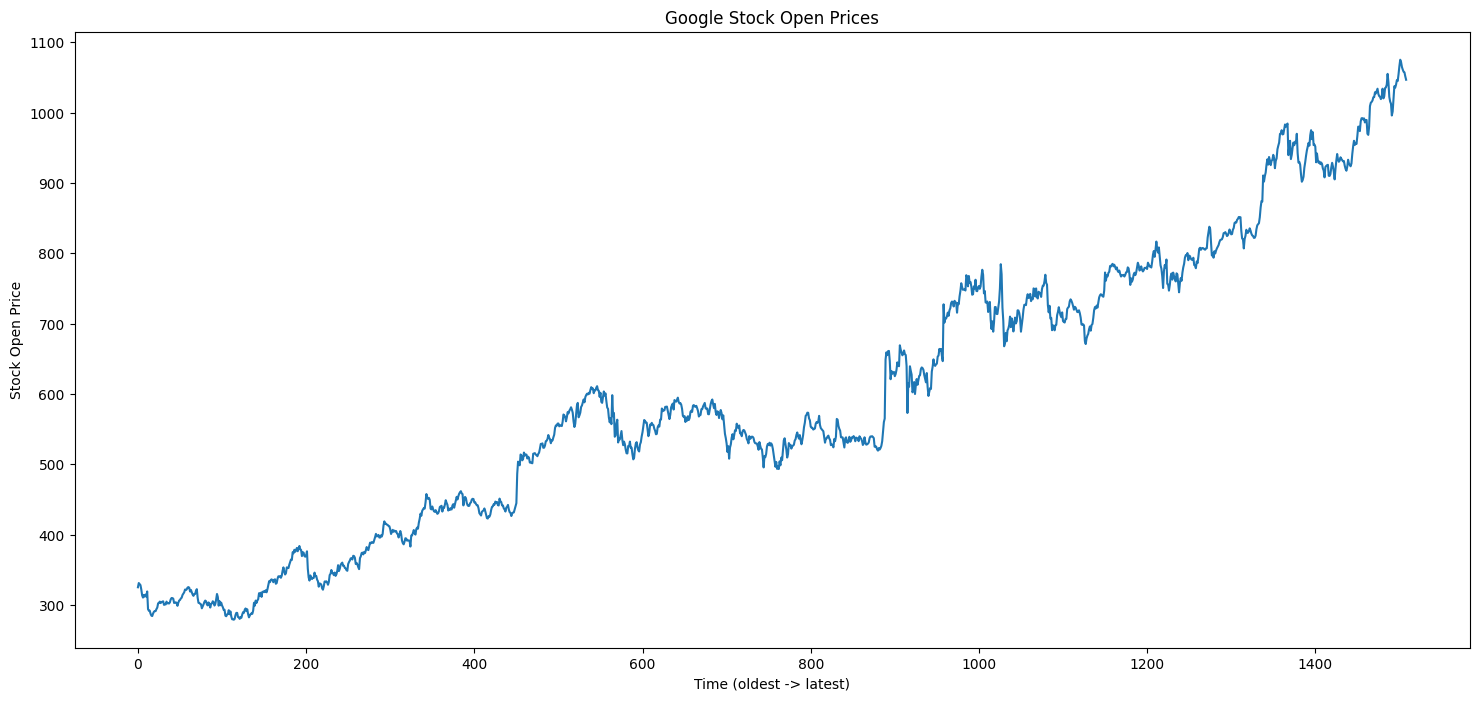

In [4]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [25]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)
print(training_set.shape)
print(training_set_scaled.shape)

(1509, 1)
(1509, 1)


In [6]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train.shape

(1449, 60)

In [8]:

y_train.shape

(1449,)

In [9]:
X_train = np.reshape(X_train, newshape =
                     (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1449, 60, 1)

In [30]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = False, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))


##add 2nd lstm layer: 50 neurons
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
#regressor.add(LSTM(units = 50, return_sequences = False))
#regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [31]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10400     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 20)

Epoch 1/20
46/46 [==============================] - 4s 21ms/step - loss: 0.0336
Epoch 2/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0042
Epoch 3/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0034
Epoch 4/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0028
Epoch 5/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0027
Epoch 6/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0024
Epoch 7/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0022
Epoch 8/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0019
Epoch 9/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0019
Epoch 10/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0018
Epoch 11/20
46/46 [==============================] - 1s 31ms/step - loss: 0.0018
Epoch 12/20
46/46 [==============================] - 2s 33ms/step - loss: 0.0019
Epoch 13/20
46/46 [==================

In [34]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [35]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [36]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [37]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [38]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(125, 60, 1)


In [39]:
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price.shape)

4/4 [==============================] - 0s 13ms/step
(125, 1)


In [40]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

(125, 1)


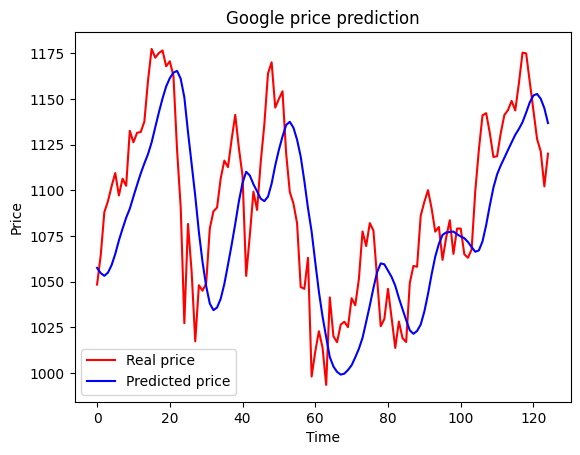

In [41]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()